In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end=end, auto_adjust=True)


import warnings
warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,31.243078,34.007129,25.823677,27.888951,855215656
2007-10-08,29.643663,32.299015,29.457322,32.299015,126671715
2007-10-09,31.662350,31.941859,28.059768,29.659189,116725709
2007-10-10,31.957388,32.609580,31.677878,32.485352,67931378
2007-10-11,35.528912,37.268090,31.677877,37.268090,106320954


In [5]:
df.shape

(4208, 5)

In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,76.940540,77.940330,75.952691,76.976097,1.188963e+07
std,62.451612,63.182031,61.673576,62.433572,2.061999e+07
min,18.241364,19.499388,16.354326,19.405036,0.000000e+00
25%,35.067369,35.620614,34.549476,35.103284,4.799653e+06
50%,53.283848,53.899080,52.570748,53.386136,8.344398e+06
75%,79.787125,80.739492,78.841023,79.808833,1.362032e+07
max,348.714539,349.477891,340.842340,347.378627,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,31.243078231811523,34.0071285266308,25.8236770420442,27.888950896412382,855215656
2,1,2007-10-08,29.64366340637207,32.29901483541143,29.457322142303784,32.29901483541143,126671715
3,2,2007-10-09,31.662349700927734,31.941859476681888,28.05976755693164,29.659188585400877,116725709
4,3,2007-10-10,31.957387924194336,32.60958020221288,31.677878151426185,32.4853519984062,67931378


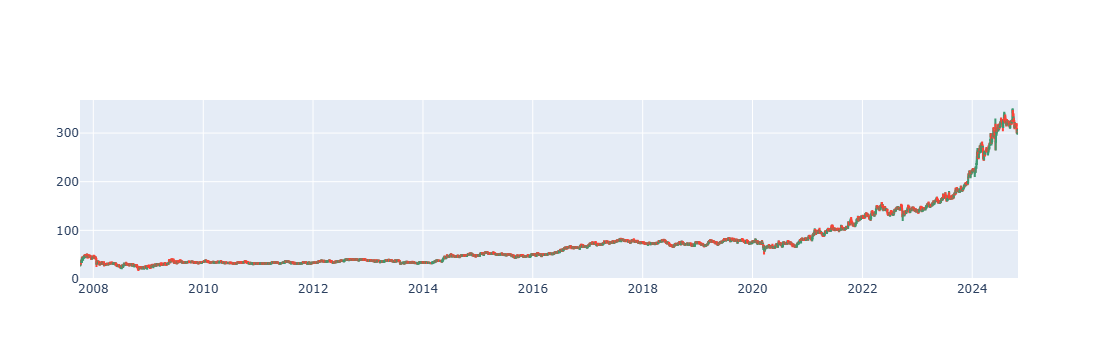

In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df = df.drop(['Date'], axis = 1)

In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,31.243078,34.007129,25.823677,27.888951,855215656
1,29.643663,32.299015,29.457322,32.299015,126671715
2,31.662350,31.941859,28.059768,29.659189,116725709
3,31.957388,32.609580,31.677878,32.485352,67931378
4,35.528912,37.268090,31.677877,37.268090,106320954


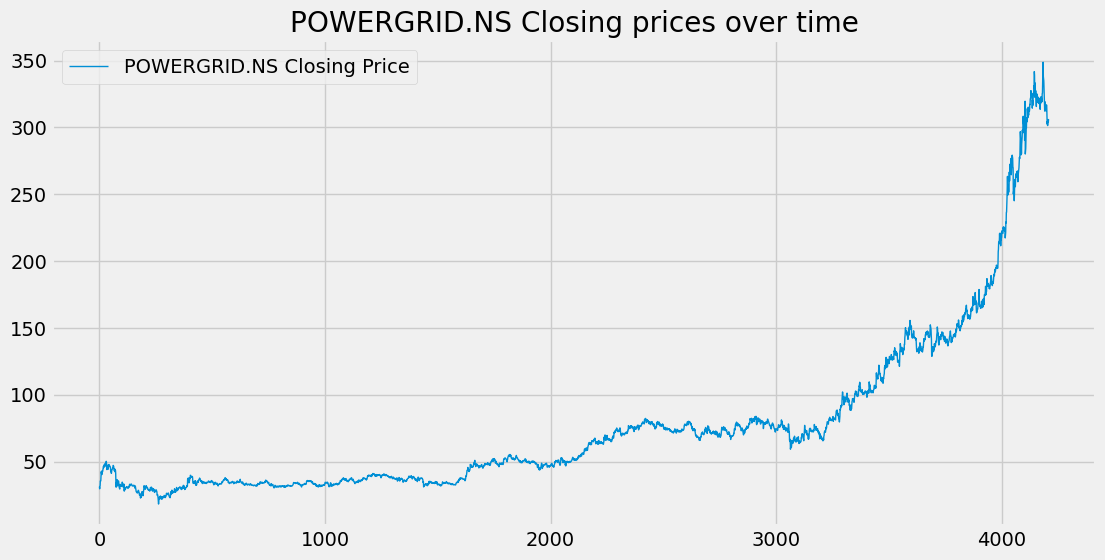

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

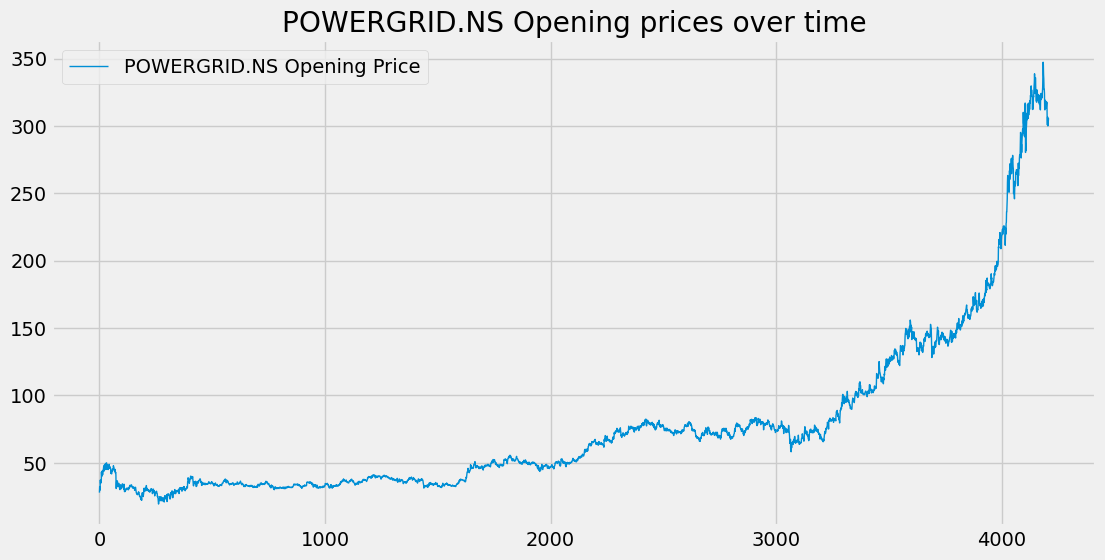

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

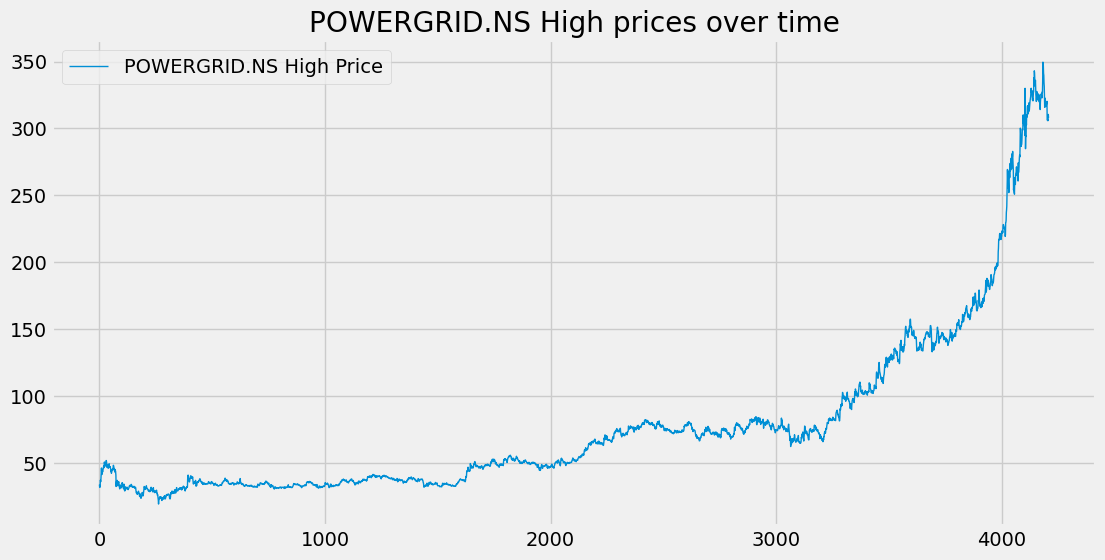

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

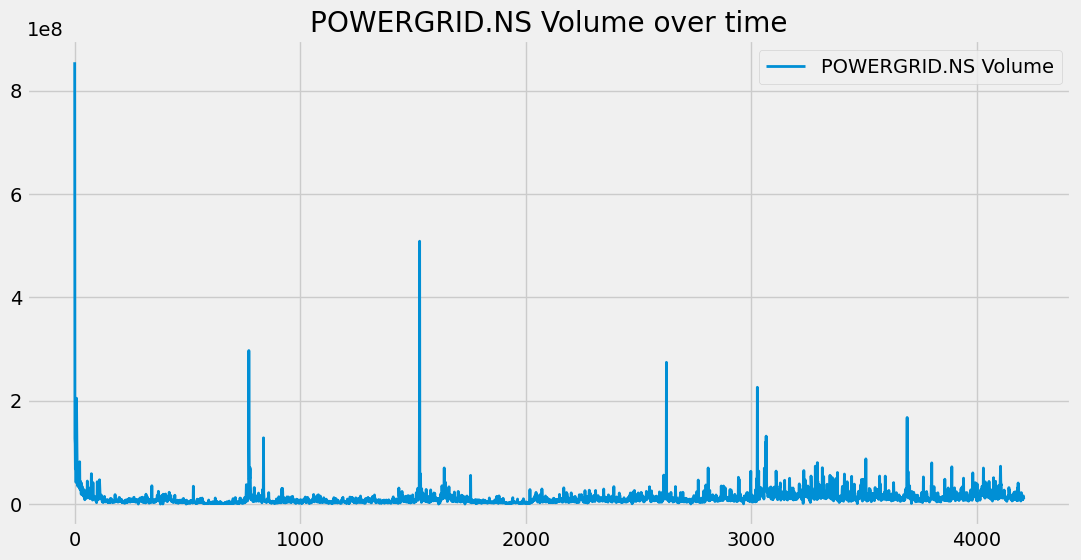

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [21]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [22]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [23]:
ma100 = df.Close.rolling(100).mean()

In [24]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,318.240847
4204,318.477398
4205,318.708448
4206,318.903846


In [25]:
ma200 = df.Close.rolling(200).mean()

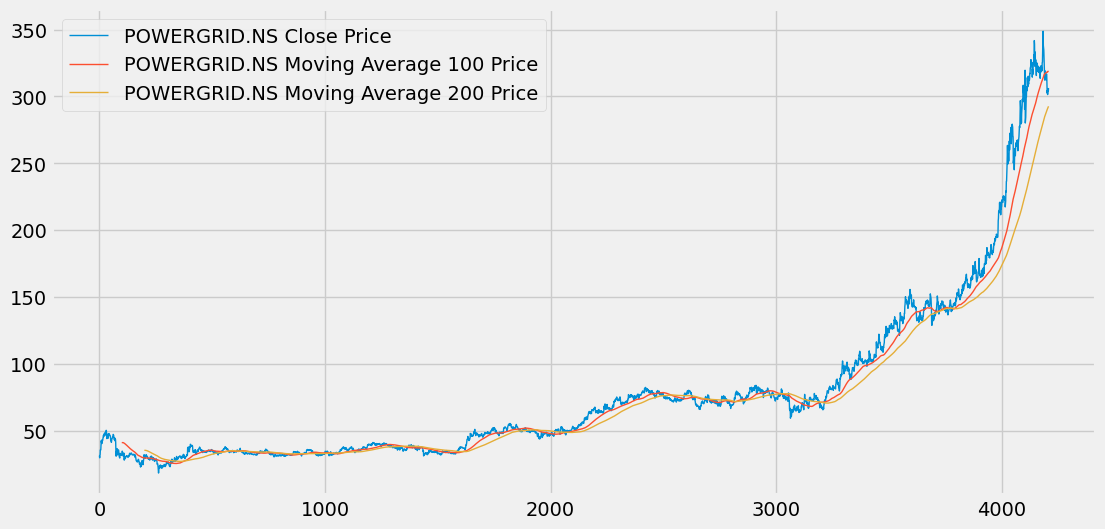

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [27]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [28]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

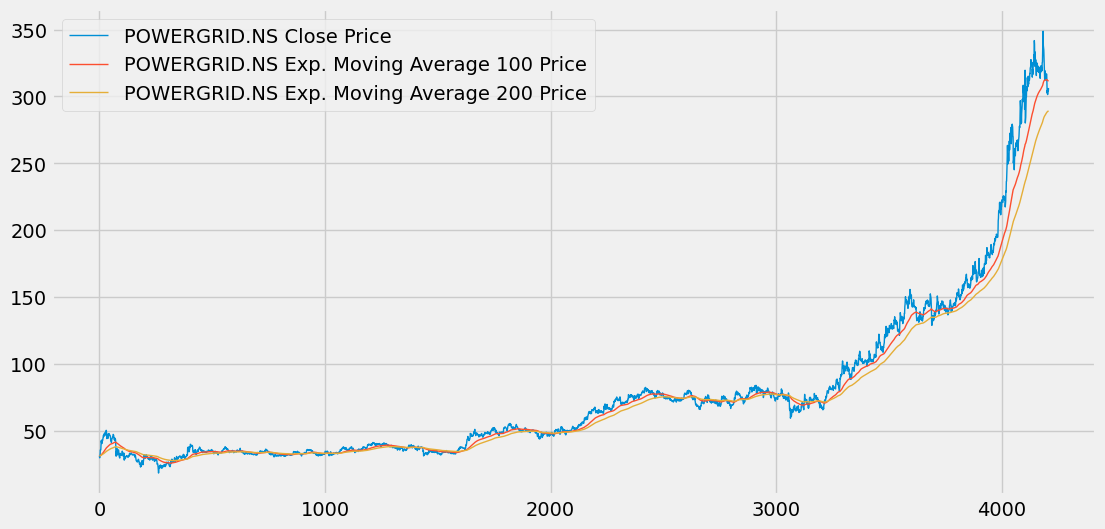

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [30]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [31]:
data_training.shape

(2945, 1)

In [32]:
data_testing.shape

(1263, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [34]:
data_training_array = scaler.fit_transform(data_training)

In [35]:
data_training_array

array([[0.1980859 ],
       [0.17371823],
       [0.20447366],
       ...,
       [0.90774403],
       [0.86000367],
       [0.87299649]], shape=(2945, 1))

In [36]:
data_training_array.shape[0]

2945

In [37]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [38]:
x_train.shape

(2845, 100, 1)

In [39]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 210ms/step - loss: 0.0388
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - loss: 0.0084
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - loss: 0.0072
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 0.0068
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - loss: 0.0058
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - loss: 0.0054
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - loss: 0.0056
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - loss: 0.0052
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - loss: 0.0048
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - loss: 0.0042
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - loss: 0.0046
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - loss: 0.0041
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - loss: 0.0042
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - loss: 0.0040
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [43]:
past_100_days = data_training.tail(100)

In [44]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [45]:
final_df.head()

Ticker,POWERGRID.NS
0,73.060181
1,74.549606
2,74.804375
3,74.647591
4,75.078751


In [46]:
input_data = scaler.fit_transform(final_df)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [48]:
x_test.shape

(1263, 100, 1)

In [49]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


In [50]:
y_predicted.shape

(1263, 1)

In [51]:
scaler.scale_

array([0.00345503])

In [52]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

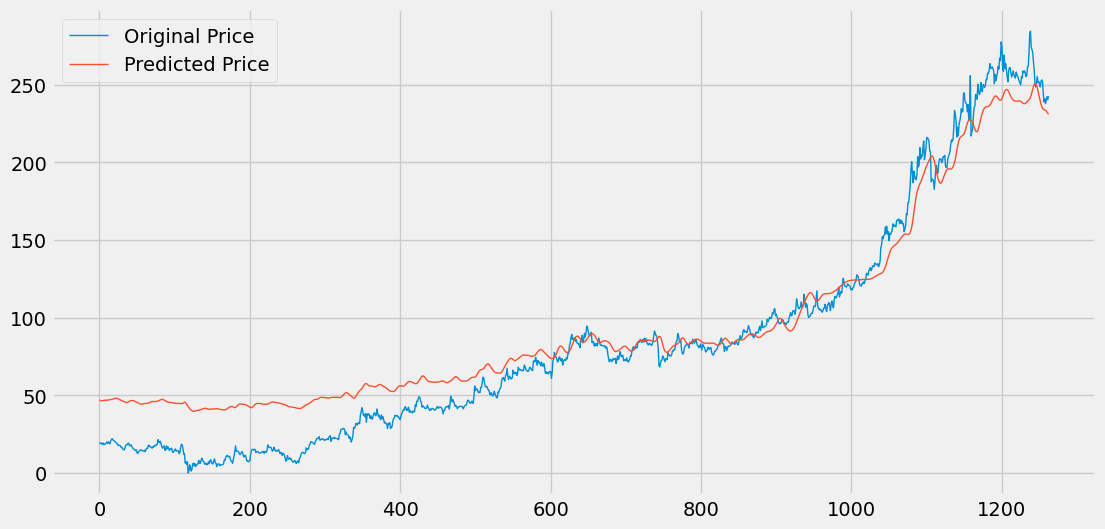

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [54]:
#model.save('stock_dl_model.h5')
model.save("stock_model.keras")